In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from graphviz import Source
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, cross_val_score
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import make_scorer
from sklearn.utils import shuffle
from sklearn.svm import SVR

In [4]:
def evaluate(model, X, Y):
    strat_k_fold = KFold(n_splits=3, shuffle=True, random_state=2020)
    mae = make_scorer(mean_absolute_error)
    return np.mean(cross_val_score(model, X, Y, scoring = mae, cv = strat_k_fold))

In [5]:
df = pd.read_csv('DATA_RETO_2.csv', encoding = 'iso-8859-1')
df.head()

,Country,Country_code,ISO,Date,Continent,WHO_region,Day_of_infection,Day_since_10_cases,Latitude,Longitude,...,gdp_per_capita,extreme_poverty,cvd_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,Cumulative_cases
0,Afghanistan,AF,AFG,12-04-2020,Asia,EMRO,48,30,33.000,65.000,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.50,64.83,555
1,Albania,AL,ALB,09-04-2020,Europe,EURO,31,30,41.153,20.168,...,11803.431,1.1,304.195,10.08,7.1,51.2,NaN,2.89,78.57,409
2,Algeria,DZ,DZA,02-04-2020,Africa,AFRO,37,30,28.034,1.660,...,13913.839,0.5,278.364,6.73,0.7,30.4,83.741,1.90,76.88,847
3,Andorra,AD,AND,14-04-2020,Europe,EURO,43,30,42.506,1.522,...,NaN,NaN,109.135,7.97,29.0,37.8,NaN,0.00,83.73,651
4,Angola,AO,AGO,03-05-2020,Africa,AFRO,43,30,-11.203,17.874,...,5819.495,NaN,276.045,3.94,NaN,NaN,26.664,0.00,61.15,35


In [6]:
X = df.copy().drop(['Country','Country_code', 'ISO', 'Cumulative_cases'], axis=1)
Y = df.copy()['Cumulative_cases']

In [7]:
cols_with_missings = []
for col in X.columns:
    if ~(df.dtypes[col]==np.object):
        missings = np.sum(pd.isna(X[col]))
        print(col, ':', missings)
        if missings:
            cols_with_missings += [col]

Date : 0
Continent : 0
WHO_region : 0
Day_of_infection : 0
Day_since_10_cases : 0
Latitude : 6
Longitude : 6
population : 0
population_density : 7
median_age : 5
aged_65_older : 5
aged_70_older : 5
gdp_per_capita : 22
extreme_poverty : 82
cvd_death_rate : 5
diabetes_prevalence : 5
female_smokers : 63
male_smokers : 63
handwashing_facilities : 111
hospital_beds_per_thousand : 5
life_expectancy : 0


In [8]:
imp = SimpleImputer(missing_values=np.nan, strategy='mean')

for col in cols_with_missings:
    X[col] = imp.fit_transform(X[[col]]).ravel()


In [9]:
X = pd.get_dummies(X, prefix_sep='_')
X

,Day_of_infection,Day_since_10_cases,Latitude,Longitude,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,...,Continent_Europe,Continent_North America,Continent_Oceania,Continent_South America,WHO_region_AFRO,WHO_region_AMRO,WHO_region_EMRO,WHO_region_EURO,WHO_region_SEARO,WHO_region_WPRO
0,48,30,33.000,65.000,38928341,54.422,18.6,2.581,1.337,1803.98700,...,0,0,0,0,0,0,1,0,0,0
1,31,30,41.153,20.168,2877800,104.871,38.0,13.188,8.643,11803.43100,...,1,0,0,0,0,0,0,1,0,0
2,37,30,28.034,1.660,43851043,17.348,29.1,6.211,3.857,13913.83900,...,0,0,0,0,1,0,0,0,0,0
3,43,30,42.506,1.522,77265,163.755,0.0,0.000,0.000,19516.18362,...,1,0,0,0,0,0,0,1,0,0
4,43,30,-11.203,17.874,32866268,23.890,16.8,2.405,1.362,5819.49500,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,30,30,6.424,-66.590,28435943,36.253,29.0,6.614,3.915,16745.02200,...,0,0,0,1,0,1,0,0,0,0
197,40,30,16.000,108.000,97338583,308.127,32.6,7.150,4.718,6171.88400,...,0,0,0,0,0,0,0,0,0,1
198,52,30,15.553,48.516,29825968,53.508,20.3,2.922,1.583,1479.14700,...,0,0,0,0,0,0,1,0,0,0
199,38,30,-15.417,28.283,18383956,22.995,17.7,2.480,1.542,3689.25100,...,0,0,0,0,1,0,0,0,0,0


In [10]:
model = SVR()
model.fit(X,Y)
evaluate(model, X, Y)

2151.4760457976595

In [11]:
pd.DataFrame({'Predicted':model.predict(X),
              'Real':Y})

,Predicted,Real
0,311.312437,555
1,308.049057,409
2,311.815181,847
3,307.841531,651
4,310.705380,35
...,...,...
196,310.272676,171
197,317.142224,16
198,310.407307,327
199,309.335480,84


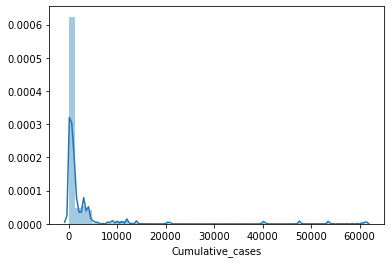

In [16]:
sns.distplot(Y);

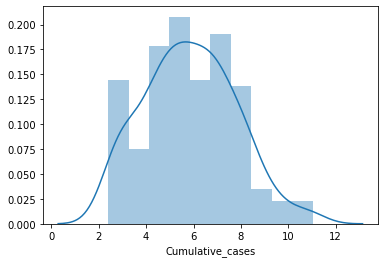

In [17]:
Y = np.log1p(Y)
sns.distplot(Y);